In [8]:
%run ../includes/common-20230414.ipynb

CPython 2024-01-15T08:21:27.645384


CPU times: user 406 µs, sys: 285 µs, total: 691 µs
Wall time: 710 µs


In [9]:
if not os.path.exists("../../data/breakdown-stats/"):
    os.system("cd ../../data && bash get-tectonic.sh")

In [10]:
dfc_raw = get_df()

In [11]:
dfs_1 = get_data(dfc_raw, default_sample_ratio=1)

9065


/tmp/ipykernel_7176/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)
/tmp/ipykernel_7176/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)


In [12]:
def relabel_leg_part(mapping=None, ax=None, **kwargs):
    ax = ax or plt.gca()
    h, labels = ax.get_legend_handles_labels()
    labels = [mapping[x.split('@')[0]] for x in labels]
    return plt.legend(h, labels, **kwargs)


In [13]:
def shorten_ticks():
    for ax in plt.gcf().get_axes():
        locs = ax.get_xticks()
        order = ax.get_xticklabels()
        ax.set_xticks(locs, [x.get_text().replace("Baleen (", "Baleen\n(") for x in order],
           va='center', ha='right', rotation_mode='anchor', rotation=90)


array(['RejectX', 'Baleen (No Prefetch)', 'Baleen (ML Prefetch)'],
      dtype=object)

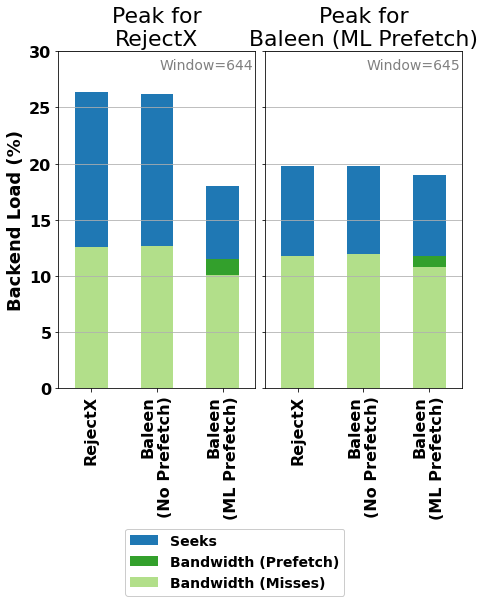

In [14]:
for region in ['Region1']:
    dtx = filter_df(dfs_1['exp'], {'Region': region, 
                              'PracticalAP': True,
                                    'AdmissionPolicyLabel': ['Baleen', 'RejectX'], 
                                    "ShortLabel": ["RejectX", "Baleen (No Prefetch)", "Baleen (ML Prefetch)", "Baleen (ML-Range on Partial Hit)"],
                                    'Target DWPD': 7.5, 'SampleStart': 0})
    dtx['Filename'] = dtx.apply(lambda v: f"../../data/breakdown-stats/{v['Region']}/ap_{v['AdmissionPolicyLabel']}/pf_{v['Prefetch-Range']}_{v['Prefetch-When']}/full_{v['SampleStart']}_{v['SampleRatio']:g}_cache_perf.txt.lzma", axis=1)
    try:
        sample_ratio = dtx['SampleRatio'].unique()[0]
        new_cols = dtx.apply(processors.maxstats, axis=1, result_type='expand')
        dtx_ = pd.concat([dtx, new_cols], axis='columns')
        display(dtx['ShortLabel'].unique())
        processors.plot_breakdowns(dtx_, x='ShortLabel', subplots_order=['RejectX', 'Baleen (ML Prefetch)'],
                        order=None,
                        sample_ratio=1, xperiod=600,
                        figsize=(6.4,4.8*1.5),
                        max_y=30,
                        leg_kwargs=dict(bbox_to_anchor=[.5, 0], loc='upper center', frameon=True, facecolor='white', framealpha=1),
                        stack_order=[processors.stonbw_label, processors.stonpf_label, processors.stonios_label])
        shorten_ticks()
        sample_ratio_t = '{:g}'.format(sample_ratio).replace(".","")
        savefig("peak_breakdowns", f"{region}_0_{sample_ratio_t}_wr-34_st-util")
    except Exception as e:
        #raise
        print("Error")
        print(e)
